In [32]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [33]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/framingham.csv")
df.rename({'male': 'sex'}, axis=1, inplace=True)
df.dtypes


sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [34]:
df

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# DataCleaning - General

In [35]:
#create AgeRange categories to fill nan values by category
bins = [0, 30, 40, 50, 60, 70, np.inf]
labels = ['0-30', '30-40', '40-50', '50-60', '60-70', '70+']

df['AgeRange'] = pd.cut(df['age'], bins, labels=labels)

print(df.dtypes)
print(df)

sex                   int64
age                   int64
education           float64
currentSmoker         int64
cigsPerDay          float64
BPMeds              float64
prevalentStroke       int64
prevalentHyp          int64
diabetes              int64
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD            int64
AgeRange           category
dtype: object
      sex  age  education  ...  glucose  TenYearCHD  AgeRange
0       1   39        4.0  ...     77.0           0     30-40
1       0   46        2.0  ...     76.0           0     40-50
2       1   48        1.0  ...     70.0           0     40-50
3       0   61        3.0  ...    103.0           1     60-70
4       0   46        3.0  ...     85.0           0     40-50
...   ...  ...        ...  ...      ...         ...       ...
4233    1   50        1.0  ...     86.0           1     40-50
4234    1   51

In [36]:
df.shape
print(df.isnull().sum())


sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
AgeRange             0
dtype: int64


# DataCleaning - BPMeds, CigsperDay, totChol

In [37]:
print(df.BPMeds.value_counts())
# fill NaN values in BPMeds column with 0 
df.BPMeds.fillna(0,inplace=True)


0.0    4061
1.0     124
Name: BPMeds, dtype: int64


In [38]:
#cigs per day
null_data_cpd = df[df.isnull().cigsPerDay]
print(null_data_cpd[["currentSmoker","cigsPerDay","AgeRange"]])
#all the missing values of cigsperday are from people who are actually smoking, so we can fill missing values with mean of smokers
df.cigsPerDay.fillna(df.cigsPerDay.mean(),inplace=True)

#totChol
#fill the missing values with the mean
df.totChol.fillna(df.totChol.mean(),inplace=True)

      currentSmoker  cigsPerDay AgeRange
131               1         NaN    40-50
139               1         NaN    40-50
1046              1         NaN    40-50
1292              1         NaN    40-50
1347              1         NaN    50-60
1451              1         NaN    50-60
1497              1         NaN    50-60
1610              1         NaN    60-70
1625              1         NaN    40-50
1870              1         NaN    40-50
1963              1         NaN    40-50
1980              1         NaN    50-60
2405              1         NaN    40-50
2513              1         NaN    40-50
2542              1         NaN    50-60
3021              1         NaN    50-60
3034              1         NaN    50-60
3094              1         NaN    40-50
3106              1         NaN    40-50
3108              1         NaN    30-40
3156              1         NaN    30-40
3177              1         NaN    40-50
3309              1         NaN    50-60
3432            

# DataCleaning - Heart Rate

In [39]:
#heartrate
df.dropna(subset = ["heartRate"], inplace=True)
print(df.isnull().sum())


sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            0
glucose            388
TenYearCHD           0
AgeRange             0
dtype: int64


# DataCleaning - Eductaion, BMI

In [40]:
#set education to 1
df.loc[:,'education'] = '1'
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,AgeRange
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,30-40
1,0,46,1,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40-50
2,1,48,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,40-50
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,60-70
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,40-50


In [41]:
#fill missing values of BMI with mean value of the category
null_data_BMI = df[df.isnull().BMI]
print(null_data_BMI[["sex","BMI","AgeRange"]])



      sex  BMI AgeRange
97      0  NaN    30-40
294     0  NaN    40-50
705     0  NaN    40-50
1155    0  NaN    60-70
1161    0  NaN    40-50
1594    0  NaN    30-40
1604    1  NaN    30-40
1624    0  NaN    60-70
1747    0  NaN    50-60
1975    1  NaN    60-70
2048    0  NaN    30-40
2067    0  NaN    50-60
2091    1  NaN    60-70
2177    0  NaN    50-60
2529    0  NaN    30-40
2719    1  NaN    30-40
2925    1  NaN    60-70
3090    0  NaN    60-70
3339    0  NaN    60-70


In [42]:
df.groupby('AgeRange')['BMI'].mean()

AgeRange
0-30           NaN
30-40    24.971649
40-50    25.511270
50-60    26.266795
60-70    26.630753
70+            NaN
Name: BMI, dtype: float64

In [43]:
#Category 30-40
df.loc[(df['AgeRange']=="30-40"), 'BMI'].mean()
df.loc[(df['AgeRange']=="30-40"), 'BMI'] = df.BMI.fillna(df.loc[(df['AgeRange']=="30-40"), 'BMI'].mean())
print(df[df['AgeRange'] == '30-40'].isnull().sum())
df[df['AgeRange'] == '30-40'].head()


sex                 0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose            70
TenYearCHD          0
AgeRange            0
dtype: int64


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,AgeRange
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,30-40
14,0,39,1,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0,30-40
15,0,38,1,1,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.0,1,30-40
18,0,38,1,1,5.0,0.0,0,0,0,195.0,122.0,84.5,23.24,75.0,78.0,0,30-40
27,1,35,1,1,20.0,0.0,0,1,0,225.0,132.0,91.0,26.09,73.0,83.0,0,30-40


In [44]:
#Category 40-50
df.loc[(df['AgeRange']=="40-50"), 'BMI'].mean()
df.loc[(df['AgeRange']=="40-50"), 'BMI'] = df.BMI.fillna(df.loc[(df['AgeRange']=="40-50"), 'BMI'].mean())

#Category 50-60
df.loc[(df['AgeRange']=="50-60"), 'BMI'].mean()
df.loc[(df['AgeRange']=="50-60"), 'BMI'] = df.BMI.fillna(df.loc[(df['AgeRange']=="50-60"), 'BMI'].mean())

#Category 60-70
df.loc[(df['AgeRange']=="60-70"), 'BMI'].mean()
df.loc[(df['AgeRange']=="60-70"), 'BMI'] = df.BMI.fillna(df.loc[(df['AgeRange']=="60-70"), 'BMI'].mean())

print(df.isnull().sum())




sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            388
TenYearCHD           0
AgeRange             0
dtype: int64


# K Nearest Neighbors for glucose

In [52]:
#save missing values of glucose in seperate dataset
null_data_glucose = df[df.isnull().glucose]
null_data_glucose = null_data_glucose.drop("AgeRange", axis=1)
null_data_glucose = null_data_glucose.drop("TenYearCHD", axis=1)
null_data_glucose = null_data_glucose.drop("glucose", axis=1)
null_data_glucose = null_data_glucose.values
print(null_data_glucose)

[[0 39 '1' ... 64.0 22.35 85.0]
 [0 43 '1' ... 77.5 29.89 70.0]
 [0 60 '1' ... 72.5 26.59 65.0]
 ...
 [0 51 '1' ... 80.0 25.6 75.0]
 [0 56 '1' ... 102.0 22.89 57.0]
 [0 44 '1' ... 87.0 19.16 86.0]]


In [59]:
#k-neartes neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
df_train = df.drop(columns=["AgeRange","TenYearCHD"], axis=1)
df_train = df_train.dropna()

#define distances on the vectors of the independent variables, so first get pandas DataFrame into a NumPy array
X = df_train.drop("glucose", axis=1)
X = X.values    #independet variables
y = df_train["glucose"]
y = y.values  #dependet variable of the model

print(X.shape, y.shape)

(3849, 14) (3849,)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
print(X_test.shape, y_test.shape)

(770, 15) (770,)


In [48]:
#Data Standardization
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()

# transform data
X_train = scaler.fit_transform(X_train) #only fit the training set
X_test = scaler.transform(X_test) 



In [49]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 100),
              "weights": ["uniform","distance"],
              "metric": ["euclidean", "manhattan"]}
              
gs=GridSearchCV(KNeighborsRegressor(), parameters, scoring="neg_mean_squared_error",cv=10, n_jobs=-1)

#fitting the model for grid
gs_results = gs.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
print(gs_results.best_params_)
#beste metrik durch GridSearch

In [ ]:
print(gs_results.best_score_) #andere metrik

-371.48355971224066


In [ ]:
#Cross Validation
#import k-folder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 19)

# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
score = cross_val_score(knn, X, y, cv=5, scoring="neg_root_mean_squared_error")
#takes the features X (independet variables) and target y (dependent variable) -> splits into k-folds (cv parameter)
#Model is trained using K-1 of the folds as training data
print(score)

#average of these five scores to get accuracy score
print("The accuracy of the model is : ", -score.mean())

[-17.5410715  -22.31395855 -22.18671166 -25.99722174 -30.11024355]
The accuracy of the model is :  23.629841400593754


In [ ]:
#Fit Knn Model based on grid Search findings
knn = KNeighborsRegressor(n_neighbors=19, weights='distance', metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='distance')

In [ ]:
#Model evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt
y_preds = knn.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = sqrt(mse)
rmse

18.802557997690304

In [60]:
X = scaler.fit_transform(X)

In [61]:
#Fit knn model on whole dataset
knn1 = KNeighborsRegressor(n_neighbors=19, weights='distance', metric='euclidean')
knn1.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='distance')

In [62]:
#Use Knn to predict the nan values of glucose
null_data_glucose = scaler.transform(null_data_glucose) 
gluc_preds = knn1.predict(null_data_glucose)
gluc_preds


array([ 82.23481616,  80.83485149,  83.08962258,  76.38110279,
        74.4601769 ,  83.75923673,  78.78679958,  80.53487079,
        72.87478923,  77.66680115,  77.75320995,  79.04848304,
        75.45434753,  80.27894407,  87.3666857 , 168.5525363 ,
        79.00023417,  74.5918825 ,  76.01415379,  76.37941822,
        78.54498325, 147.82691767,  79.67279747,  78.3107782 ,
        82.00386889,  83.36809247,  73.66846965,  80.69767312,
        85.04673731,  77.12783403,  80.06783857,  79.27998897,
        83.41819394,  80.64165437,  78.82094993,  75.0724475 ,
        82.66017274,  78.00612356,  81.50763407,  79.71903715,
        84.85222126,  76.96697864,  75.85328478,  80.89652346,
        75.19680216,  77.16571688,  81.49580212,  86.34922871,
        83.10385462,  80.77588142,  82.07029661,  84.45781683,
        78.99798278,  80.63668662,  89.38695467,  81.37959677,
        75.61061651,  76.47070092,  79.47702647,  78.35040816,
        78.25358813,  81.63864773,  77.21863653,  81.14

In [63]:
glu_nan = df['glucose'].isna()
glu_nan.value_counts()

df.loc[glu_nan, 'glucose'] = gluc_preds


In [64]:
print(df.isnull().sum())

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
AgeRange           0
dtype: int64


# Linear Regression for Glucose

In [65]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
#evaluate the fit on the testing data
y_pred_lin = regr.predict(X_test)

#print('Coefficients: \n', regr.coef_)
# The mean squared error
mse_lin_test = (mean_squared_error(y_test, y_pred_lin))
rmse = sqrt(mse_lin_test)
print(rmse)

# The coefficient of determination: 1 is perfect prediction
print(r2_score(y_test, y_pred_lin))

18.679285557874415
0.3958693322205926


In [ ]:
#evaluate the fit on the training data
y_pred_lin1 = regr.predict(X_train)

#print('Coefficients: \n', regr.coef_)
# The mean squared error
mse_lin_train = (mean_squared_error(y_train, y_pred_lin1))
rmse1 = sqrt(mse_lin_train)
print(rmse1)
# The coefficient of determination: 1 is perfect prediction
print(r2_score(y_train, y_pred_lin1))

18.62498157775653
0.3947602078289537


# KNN Try outs

In [ ]:
correlation_matrix = df.corr()
correlation_matrix["glucose"]

sex                0.005974
age                0.122139
currentSmoker     -0.056935
cigsPerDay        -0.058956
BPMeds             0.050982
prevalentStroke    0.018439
prevalentHyp       0.086715
diabetes           0.617657
totChol            0.046413
sysBP              0.140506
diaBP              0.061301
BMI                0.086830
heartRate          0.094500
glucose            1.000000
TenYearCHD         0.125406
Name: glucose, dtype: float64

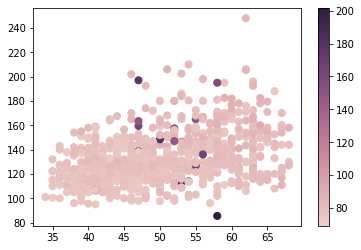

In [ ]:
#Plotting the model
#create a scatter plot of the first and second columns of X_test by subsetting the arrays X_test[:,1] and X_test[:,10]
#columns are age and sysBP --> correlated
#colorbar shows predicted glucose value
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 1], X_test[:, 10], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

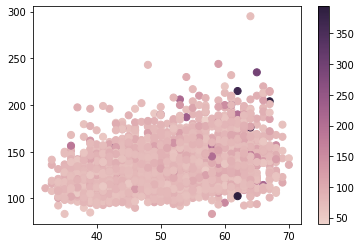

In [ ]:
f, ax = plt.subplots()
points = ax.scatter(X_train[:, 1], X_train[:, 10], c=train_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

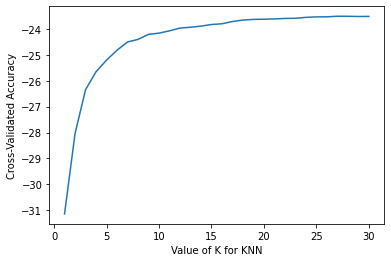

In [ ]:
#choose differenct neighbors to see which K is the best K
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 100
k_range = range(1, 31)

k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring="neg_root_mean_squared_error")
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()